In [1]:
import os
import sys
sys.path.append("D:/DevSpace/Projects/DeepLearning/Research")
import pandas as pd

In [2]:
MAIN_PATH = "D:\DevSpace\Projects\DeepLearning\Research\data"
RAW_PATH = os.path.join(MAIN_PATH, "01_raw")
INTERMEDIATE_PATH = os.path.join(MAIN_PATH, "02_intermediate")
PRIMARY_PATH = os.path.join(MAIN_PATH, "03_primary")

In [3]:
df1 = pd.read_csv(
    os.path.join(
        PRIMARY_PATH, 
        os.path.join(
            "model_input_data_2025-02-03_13-21",
            "model_input_data.csv"
        )
    )
)

In [4]:
df2 = pd.read_csv(
    os.path.join(
        PRIMARY_PATH, 
        os.path.join(
            "model_input_data_2025-02-04_09-27",
            "model_input_data.csv"
        )
    )
)

In [34]:
fileid = df1.FileId.sample().values[0]
fileid

'013_10_15_04_085_1_C'

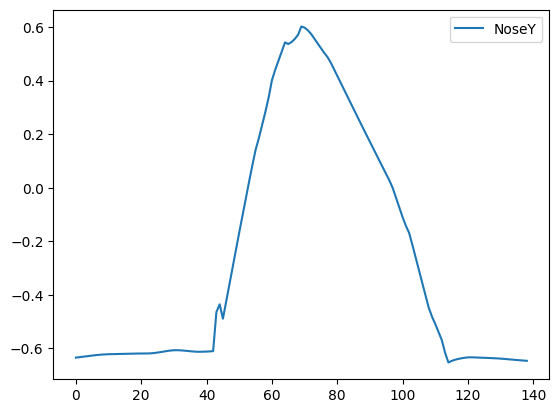

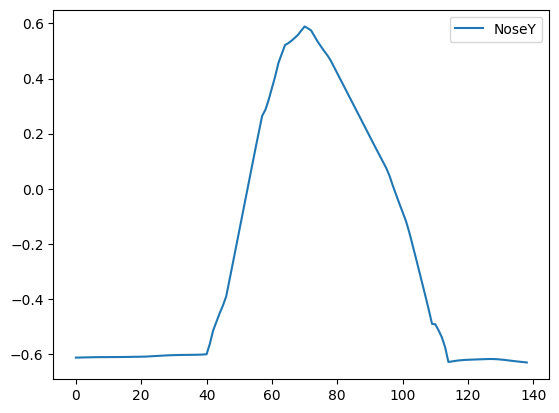

In [41]:
fileid = df1.FileId.sample().values[0]

df1[df1["FileId"] == fileid][["NoseY"]].reset_index(drop=True).plot();
df2[df2["FileId"] == fileid][["NoseY"]].reset_index(drop=True).plot();

In [42]:
fileid

'013_10_15_08_085_1_L'

In [21]:
def filter_dataframe_by_target(dataframe, parameters):
    target_threshold = parameters["target_threshold"]

    if target_threshold != 0:
        dataframe = dataframe[
            dataframe["PercentageMaxLoad"] >= target_threshold]

    return dataframe

In [24]:
filter_dataframe_by_target(df2, parameters={"target_threshold": 100})

,NoseX,NoseY,NoseZ,LeftShoulderX,LeftShoulderY,LeftShoulderZ,RightShoulderX,RightShoulderY,RightShoulderZ,LeftElbowX,...,TrainingProgram_crossfit,TrainingProgram_strength training,CameraPosition_left,CameraPosition_right,TrainingFrequency,TrainingExperience,RepNumber,Repetitions,BMI,PercentageMaxLoad
2874,-0.426609,-0.336312,0.670192,-0.035658,-0.445515,0.783905,-0.029450,-0.380080,0.776354,0.105911,...,0.0,1.0,0.0,0.0,-0.5,-0.428571,-1.0,-1.0,-0.350750,100.0
2875,-0.426231,-0.334650,0.666894,-0.035007,-0.445751,0.784037,-0.029562,-0.379502,0.779734,0.106493,...,0.0,1.0,0.0,0.0,-0.5,-0.428571,-1.0,-1.0,-0.350750,100.0
2876,-0.425849,-0.332926,0.663631,-0.034379,-0.446003,0.784190,-0.029673,-0.378950,0.783108,0.107054,...,0.0,1.0,0.0,0.0,-0.5,-0.428571,-1.0,-1.0,-0.350750,100.0
2877,-0.425460,-0.331139,0.660367,-0.033772,-0.446273,0.784356,-0.029783,-0.378423,0.786444,0.107596,...,0.0,1.0,0.0,0.0,-0.5,-0.428571,-1.0,-1.0,-0.350750,100.0
2878,-0.425063,-0.329294,0.657074,-0.033182,-0.446563,0.784524,-0.029892,-0.377916,0.789707,0.108123,...,0.0,1.0,0.0,0.0,-0.5,-0.428571,-1.0,-1.0,-0.350750,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151245,-0.770716,-0.681175,0.509861,0.051257,-0.818926,0.460466,-0.184888,-0.697674,0.680941,0.173960,...,0.0,1.0,0.0,1.0,0.0,0.428571,-1.0,-1.0,0.481538,100.0
151246,-0.766732,-0.702620,0.518037,0.055167,-0.845495,0.462303,-0.178785,-0.723431,0.684978,0.173474,...,0.0,1.0,0.0,1.0,0.0,0.428571,-1.0,-1.0,0.481538,100.0
151247,-0.762668,-0.724043,0.525825,0.059109,-0.872045,0.463974,-0.172643,-0.749178,0.688934,0.173028,...,0.0,1.0,0.0,1.0,0.0,0.428571,-1.0,-1.0,0.481538,100.0
151248,-0.758539,-0.745449,0.533253,0.063080,-0.898581,0.465497,-0.166468,-0.774918,0.692842,0.172620,...,0.0,1.0,0.0,1.0,0.0,0.428571,-1.0,-1.0,0.481538,100.0


In [25]:
import os
import matplotlib.pyplot as plt

def plot_loss_curves(losses):
    """
    Plots training and validation loss curves.
    
    Args:
        losses (dict): A dictionary containing 'train_loss' and 'valid_loss' lists.
    
    Returns:
        matplotlib.figure.Figure: The figure containing the loss curves.
    """
    n_epochs = len(losses['train_loss'])

    fig, ax = plt.subplots()
    
    ax.plot(range(1, n_epochs + 1), losses['train_loss'], label='Training Loss Curve')
    ax.plot(range(1, n_epochs + 1), losses['valid_loss'], label='Validation Loss Curve')
    
    ax.set_title('Loss Curves for Training and Validation Data')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('RMSE Loss')
    ax.grid(True)
    ax.axis('equal')
    ax.legend()

    return fig

def save_plot(fig, target_dir, filename="plot.png"):
    """
    Saves the given figure to a file.
    
    Args:
        fig (matplotlib.figure.Figure): The figure to save.
        target_dir (str): Directory where the file should be saved.
        filename (str): Name of the file (default: 'plot.png').
    """
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    
    fig.savefig(os.path.join(target_dir, filename))

# Example usage:
# losses = {'train_loss': [...], 'valid_loss': [...]}
# fig = plot_loss_curves(losses)
# save_plot(fig, "path/to/save/directory")
# plt.show()  # To display the plot after saving


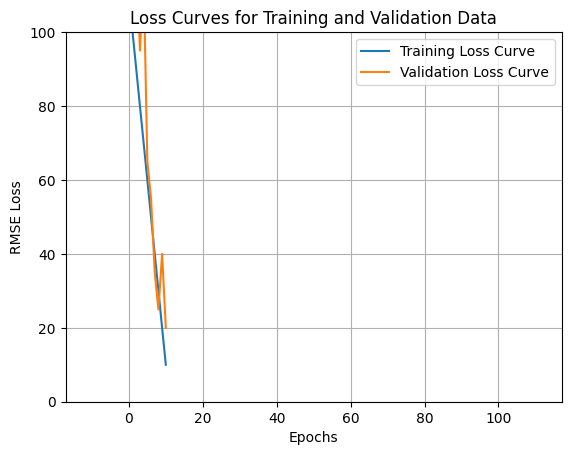

In [26]:
losses = {
    'train_loss': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10],
    'valid_loss': [205, 125, 95, 115, 65, 55, 35, 25, 40, 20]}
fig = plot_loss_curves(losses)